In [456]:
import pandas as pd
import numpy as np
import mlflow
from mlflow.tracking import MlflowClient

In [293]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from datetime import time, timedelta, datetime

In [294]:
client = MlflowClient()

In [295]:
def cast_to_datetime(seconds):
    # Convierte los segundos en horas, minutos y segundos
    seconds = round(seconds)
    hours, remainder = divmod(seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    
    # Crea un objeto time con estos valores
    return time(hour=hours, minute=minutes, second=seconds)

In [304]:
def pass_thru(value):
    return value

def get_metric_info(run_id, key, x_type = "numeric", y_type="numeric"):
    metric_history = client.get_metric_history(run_id, key)
    metric_values = [metric.value for metric in metric_history]
    metric_steps = [metric.step for metric in metric_history]
    avg_metric = sum(metric_values) / len(metric_values)


    if y_type == "time":
        avg_metric = cast_to_datetime(avg_metric)
    print(avg_metric)
    

In [305]:
def plot_metric(run_id, key, x_label, y_label, title, file_name):
    metric_history = client.get_metric_history(run_id, key)
    metric_values = [metric.value for metric in metric_history]
    metric_steps = [metric.step for metric in metric_history]

    # Crear la figura y el gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(metric_steps, metric_values, color="#F80044", linewidth=2, alpha=0.8)

    # Etiquetas y título
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Mostrar la cuadrícula
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.savefig(file_name, format='png', dpi=300, bbox_inches='tight')

    # Mostrar el gráfico
    plt.show()

    

## Obtener experimento de pre-entrenamiento

In [296]:
mlflow.set_tracking_uri("http://localhost:5000")

In [297]:
mlflow.set_experiment("Pre-train")

<Experiment: artifact_location='file:///opt/code/mlruns/489730860219751947', creation_time=1723987912634, experiment_id='489730860219751947', last_update_time=1723987912634, lifecycle_stage='active', name='Pre-train', tags={}>

## Experimento 2

#### fine-tuning

In [298]:
experiment = mlflow.get_experiment_by_name("Fine-tuning")

In [299]:
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

In [300]:
exp1 = runs[runs["tags.mlflow.runName"] == "youthful-boar-759"] ## AÚN NO ES VÁLIDO EST EXPERIMENTO.

In [301]:
exp1

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.system/gpu_2_power_usage_watts,metrics.system/gpu_2_utilization_percentage,metrics.system/gpu_3_utilization_percentage,metrics.system/gpu_3_memory_usage_percentage,...,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.source.name,tags.mlflow.parentRunId,tags.mlflow.source.git.commit,tags.pretrain_run_id,tags.mlflow.note.content,tags.pretrain_run_name,tags.pretrain
62,d885f3ef83c14f54851b3b2b32b321c3,278242996031726872,FINISHED,file:///opt/code/mlruns/278242996031726872/d88...,2024-08-27 13:07:44.168000+00:00,2024-08-27 20:39:36.825000+00:00,8.0,0.0,0.0,11.6,...,root,LOCAL,youthful-boar-759,timert_cli.py,None,87f0ecdc670444582b2d4560d2476503969e71df,07d71440248f4ed88b2d20a79725c795,parámetros congelados,gregarious-worm-576,None


In [302]:
run_id = exp1.iloc[0].run_id

In [303]:
type(run_id)

str

### Obtener conjuntos de métricas

In [306]:
exp1

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.system/gpu_2_power_usage_watts,metrics.system/gpu_2_utilization_percentage,metrics.system/gpu_3_utilization_percentage,metrics.system/gpu_3_memory_usage_percentage,...,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.source.name,tags.mlflow.parentRunId,tags.mlflow.source.git.commit,tags.pretrain_run_id,tags.mlflow.note.content,tags.pretrain_run_name,tags.pretrain
62,d885f3ef83c14f54851b3b2b32b321c3,278242996031726872,FINISHED,file:///opt/code/mlruns/278242996031726872/d88...,2024-08-27 13:07:44.168000+00:00,2024-08-27 20:39:36.825000+00:00,8.0,0.0,0.0,11.6,...,root,LOCAL,youthful-boar-759,timert_cli.py,None,87f0ecdc670444582b2d4560d2476503969e71df,07d71440248f4ed88b2d20a79725c795,parámetros congelados,gregarious-worm-576,None


In [307]:
get_metric_info("d885f3ef83c14f54851b3b2b32b321c3", "system/cpu_utilization_percentage")

4.474074074074073


In [308]:
get_metric_info("d885f3ef83c14f54851b3b2b32b321c3", "system/system_memory_usage_megabytes")

3643.4370370370375


In [309]:
get_metric_info("d885f3ef83c14f54851b3b2b32b321c3", "system/gpu_3_utilization_percentage")

22.48148148148148


In [310]:
get_metric_info("d885f3ef83c14f54851b3b2b32b321c3", "system/gpu_3_memory_usage_megabytes")

1332.737037037037


In [311]:
get_metric_info("d885f3ef83c14f54851b3b2b32b321c3", "system/gpu_3_power_usage_watts")

76.72407407407407


#### Métrcias de clasificación

In [312]:
all_runs = client.search_runs(
        experiment_ids=[experiment.experiment_id],
        filter_string=f"tags.mlflow.parentRunId = '{experiment.experiment_id}'"
    )

In [313]:
all_runs

[]

## Experimento 1

#### Pre-entrenamiento

In [489]:
experiment = mlflow.get_experiment_by_name("Pre-train")

In [490]:
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

In [491]:
exp= runs[runs["tags.mlflow.runName"] == "gregarious-worm-576"]

In [492]:
exp

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.system/gpu_2_power_usage_watts,metrics.system/gpu_2_utilization_percentage,metrics.system/gpu_3_utilization_percentage,metrics.system/gpu_3_memory_usage_percentage,...,params.aditional_loss_function,params.valid_frac,params.train_frac,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.log-model.history,tags.mlflow.note.content,tags.mlflow.source.name,tags.mlflow.source.git.commit
8,07d71440248f4ed88b2d20a79725c795,489730860219751947,FINISHED,file:///opt/code/mlruns/489730860219751947/07d...,2024-08-18 13:56:18.848000+00:00,2024-08-19 05:02:39.731000+00:00,8.1,0.0,0.0,30.6,...,L1Loss(),0.1,0.3,root,LOCAL,gregarious-worm-576,"[{""run_id"": ""07d71440248f4ed88b2d20a79725c795""...","El modelo base de referencia, entrenado con lo...",timert_cli.py,995b1db9ec141e53e944119d790943eaa895bc1c


In [493]:
run_id = exp.iloc[0].run_id

#### Obtener conjuntos de métricas

In [494]:
get_metric_info(run_id, "epoch_time", y_type="time")

00:02:16


In [495]:
get_metric_info(run_id, "system/cpu_utilization_percentage")

5.542211055276348


In [496]:
get_metric_info(run_id, "system/system_memory_usage_megabytes")

3966.983249581241


In [497]:
get_metric_info(run_id, "system/gpu_3_utilization_percentage")

63.76046901172529


In [498]:
get_metric_info(run_id, "system/gpu_3_memory_usage_megabytes")

3579.198324958096


In [499]:
get_metric_info(run_id, "system/gpu_3_power_usage_watts")

140.88860971524295


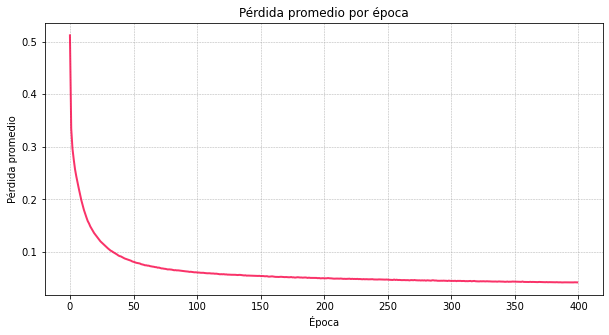

In [500]:
plot_metric(run_id, "average_loss", "Época", "Pérdida promedio", "Pérdida promedio por época", "loos_train_exp2.png")

#### Ajuste fino

In [410]:
experiment = mlflow.get_experiment_by_name("Fine-tuning")

In [411]:
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

In [412]:
exp = runs[runs["tags.mlflow.runName"] ==  "youthful-boar-759"]

In [416]:
exp

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.system/gpu_2_power_usage_watts,metrics.system/gpu_2_utilization_percentage,metrics.system/gpu_3_utilization_percentage,metrics.system/gpu_3_memory_usage_percentage,...,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.source.name,tags.mlflow.parentRunId,tags.mlflow.source.git.commit,tags.pretrain_run_id,tags.mlflow.note.content,tags.pretrain_run_name,tags.pretrain
62,d885f3ef83c14f54851b3b2b32b321c3,278242996031726872,FINISHED,file:///opt/code/mlruns/278242996031726872/d88...,2024-08-27 13:07:44.168000+00:00,2024-08-27 20:39:36.825000+00:00,8.0,0.0,0.0,11.6,...,root,LOCAL,youthful-boar-759,timert_cli.py,None,87f0ecdc670444582b2d4560d2476503969e71df,07d71440248f4ed88b2d20a79725c795,parámetros congelados,gregarious-worm-576,None


In [417]:
run_id = exp.iloc[0].run_id

In [423]:
exp_id = exp.iloc[0].experiment_id

In [418]:
get_metric_info(run_id, "system/cpu_utilization_percentage")

4.474074074074073


In [419]:
get_metric_info(run_id, "system/system_memory_usage_megabytes")

3643.4370370370375


In [420]:
get_metric_info(run_id, "system/gpu_3_utilization_percentage")

22.48148148148148


In [421]:
get_metric_info(run_id, "system/gpu_3_memory_usage_megabytes")

1332.737037037037


In [422]:
get_metric_info(run_id, "system/gpu_3_power_usage_watts")

76.72407407407407


##### Gráfica de clasificadores

In [424]:
exp_id

'278242996031726872'

In [425]:
all_runs = client.search_runs(
    experiment_ids=[exp_id],
    filter_string=f"tags.mlflow.parentRunId = '{run_id}'"
)

In [459]:
test_accuracies = [[subrun.info.run_name,
                    subrun.data.metrics['test_accuracy'],
                    subrun.data.metrics['test_balanced_accuracy']*100] for subrun in all_runs if 'test_accuracy' in subrun.data.metrics]

In [460]:
test_accuracies

[['GunPointOldVersusYoung', 46.15384615384615, 48.837209302325576],
 ['Beef', 33.33333333333333, 33.33333333333333],
 ['MiddlePhalanxOutlineCorrect', 62.01117318435754, 50.0],
 ['GunPoint', 50.0, 50.0],
 ['SmallKitchenAppliances', 34.66666666666667, 34.66666666666667],
 ['ToeSegmentation1', 42.592592592592595, 41.620879120879124],
 ['TwoLeadECG', 53.21888412017167, 53.031977600943115],
 ['SemgHandSubjectCh2', 13.333333333333334, 13.333333333333334],
 ['InsectWingbeatSound', 9.318181818181818, 9.318181818181817],
 ['ShapesAll', 2.9166666666666665, 2.9166666666666665],
 ['Crop', 3.1875, 3.1875],
 ['DodgerLoopWeekend', 28.125, 50.0],
 ['OSULeaf', 12.359550561797752, 14.655067155067156],
 ['ShapeletSim', 50.0, 50.0],
 ['EOGHorizontalSignal', 4.827586206896552, 4.700854700854701],
 ['FordA', 50.76142131979695, 49.8415671647949],
 ['DiatomSizeReduction', 27.692307692307693, 22.5],
 ['EthanolLevel', 24.875621890547265, 25.0],
 ['SonyAIBORobotSurface1', 44.0, 50.0],
 ['DistalPhalanxOutlineCorr

In [461]:
run_names = [item[0] for item in test_accuracies]
test_accuracy_values = [item[1] for item in test_accuracies]
test_balanced_accuracy_values = [item[2] for item in test_accuracies]

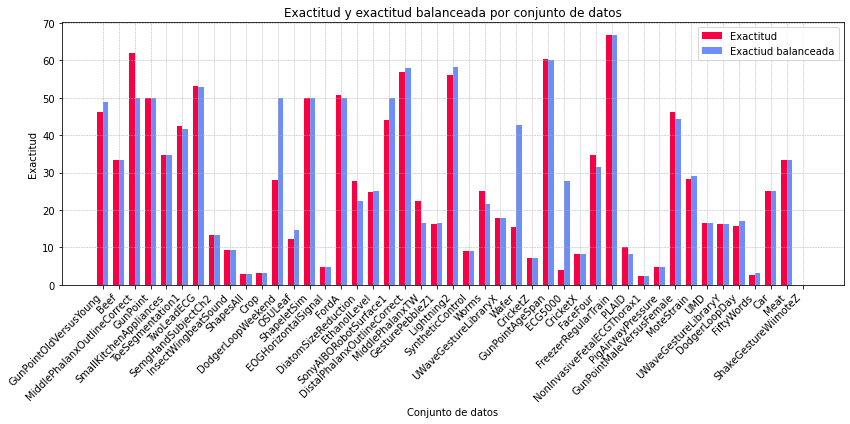

In [474]:
# Número de grupos
n_groups = len(run_names)

# Crear posiciones para las barras
index = np.arange(n_groups)
bar_width = 0.35

# Crear la figura
plt.figure(figsize=(12, 6))

# Colores
colors = ['#F80044', '#6d8dfa']

# Hachuras para las texturas
hatch_patterns = ['///|||', '---+++']  # Hachuras diferentes para cada conjunto de barras

# Gráfica de barras para test_accuracy
plt.bar(index, test_accuracy_values, bar_width, color=colors[0], label='Exactitud')

# Gráfica de barras para test_balanced_accuracy
plt.bar(index + bar_width, test_balanced_accuracy_values, bar_width, color=colors[1], label='Exactiud balanceada')

# Configuración de las etiquetas y título
plt.xlabel('Conjunto de datos')
plt.ylabel('Exactitud')
plt.title('Exactitud y exactitud balanceada por conjunto de datos')
plt.xticks(index + bar_width / 2, run_names, rotation=45, ha='right')

# Añadir la leyenda
plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig("exactitud-exp1.png", format='png', dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

## Experimento 3

#### Pre-entrenamiento

In [557]:
experiment = mlflow.get_experiment_by_name("Pre-train")

In [558]:
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

In [559]:
exp= runs[runs["tags.mlflow.runName"] == "masked-turtle-959"]

In [560]:
exp

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.system/gpu_2_power_usage_watts,metrics.system/gpu_2_utilization_percentage,metrics.system/gpu_3_utilization_percentage,metrics.system/gpu_3_memory_usage_percentage,...,params.aditional_loss_function,params.valid_frac,params.train_frac,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.log-model.history,tags.mlflow.note.content,tags.mlflow.source.name,tags.mlflow.source.git.commit
3,d5cbf6b2fb0f435da0f5c2bd1b991acc,489730860219751947,FINISHED,file:///opt/code/mlruns/489730860219751947/d5c...,2024-08-24 19:16:36.766000+00:00,2024-08-25 11:25:34.258000+00:00,144.4,95.0,96.0,30.7,...,None,None,None,root,LOCAL,masked-turtle-959,"[{""run_id"": ""d5cbf6b2fb0f435da0f5c2bd1b991acc""...",Cambio de parámetro para que ahora en las capa...,timert_cli.py,42daa673aa99fe7670284fed358788d46c2d2912


In [561]:
run_id = exp.iloc[0].run_id

#### Obtener conjuntos de métricas

In [562]:
get_metric_info(run_id, "epoch_time", y_type="time")

00:02:25


In [563]:
get_metric_info(run_id, "system/cpu_utilization_percentage")

15.345833333333333


In [564]:
get_metric_info(run_id, "system/system_memory_usage_megabytes")

9795.914583333335


In [565]:
get_metric_info(run_id, "system/gpu_2_utilization_percentage")

62.645833333333336


In [566]:
get_metric_info(run_id, "system/gpu_2_memory_usage_megabytes")

3545.798958333331


In [567]:
get_metric_info(run_id, "system/gpu_2_power_usage_watts")

116.11458333333336


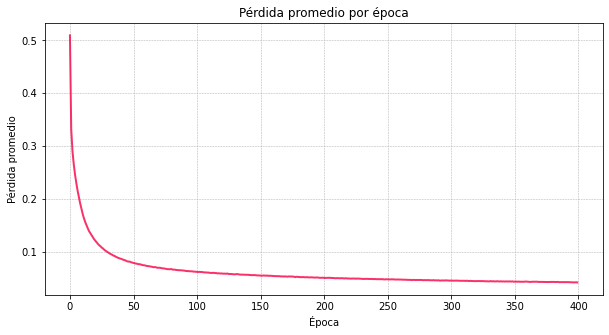

In [545]:
plot_metric(run_id, "average_loss", "Época", "Pérdida promedio", "Pérdida promedio por época", "loos_train_exp3.png")

#### Ajuste fino

In [568]:
experiment = mlflow.get_experiment_by_name("Fine-tuning")

In [569]:
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

In [570]:
exp = runs[runs["tags.mlflow.runName"] ==  "traveling-dog-615"]

In [571]:
exp

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.system/gpu_2_power_usage_watts,metrics.system/gpu_2_utilization_percentage,metrics.system/gpu_3_utilization_percentage,metrics.system/gpu_3_memory_usage_percentage,...,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.source.name,tags.mlflow.parentRunId,tags.mlflow.source.git.commit,tags.pretrain_run_id,tags.mlflow.note.content,tags.pretrain_run_name,tags.pretrain
284,8976c43d0e764229a36960c40d9bacf4,278242996031726872,FINISHED,file:///opt/code/mlruns/278242996031726872/897...,2024-08-25 18:32:56.233000+00:00,2024-08-26 05:55:51.239000+00:00,8.6,0.0,0.0,0.0,...,root,LOCAL,traveling-dog-615,timert_cli.py,None,082154634b0f7a6f5b922eae1fbb1d49b208a9b2,d5cbf6b2fb0f435da0f5c2bd1b991acc,None,masked-turtle-959,None


In [572]:
run_id = exp.iloc[0].run_id

In [573]:
exp_id = exp.iloc[0].experiment_id

In [574]:
get_metric_info(run_id, "system/cpu_utilization_percentage")

9.911111111111111


In [575]:
get_metric_info(run_id, "system/system_memory_usage_megabytes")

8469.196296296299


In [576]:
get_metric_info(run_id, "system/gpu_2_utilization_percentage")

45.65432098765432


In [577]:
get_metric_info(run_id, "system/gpu_2_memory_usage_megabytes")

2949.2444444444445


In [578]:
get_metric_info(run_id, "system/gpu_2_power_usage_watts")

97.24567901234566


##### Gráfica de clasificadores

In [579]:
exp_id

'278242996031726872'

In [580]:
all_runs = client.search_runs(
    experiment_ids=[exp_id],
    filter_string=f"tags.mlflow.parentRunId = '{run_id}'"
)

In [581]:
test_accuracies = [[subrun.info.run_name,
                    subrun.data.metrics['test_accuracy'],
                    subrun.data.metrics['test_balanced_accuracy']*100] for subrun in all_runs if 'test_accuracy' in subrun.data.metrics]

In [582]:
test_accuracies

[['GunPointOldVersusYoung', 93.4065934065934, 93.14437984496125],
 ['Beef', 83.33333333333334, 80.0],
 ['MiddlePhalanxOutlineCorrect', 84.91620111731844, 82.9954954954955],
 ['GunPoint', 97.5, 97.5],
 ['SmallKitchenAppliances', 69.33333333333334, 69.33333333333334],
 ['ToeSegmentation1', 75.92592592592592, 75.68681318681318],
 ['TwoLeadECG', 100.0, 100.0],
 ['SemgHandSubjectCh2', 91.66666666666666, 91.66666666666667],
 ['InsectWingbeatSound', 61.36363636363637, 61.36363636363637],
 ['ShapesAll', 75.0, 75.0],
 ['Crop', 74.79166666666667, 74.79166666666667],
 ['DodgerLoopWeekend', 100.0, 100.0],
 ['OSULeaf', 62.92134831460674, 61.043058248940596],
 ['ShapeletSim', 55.00000000000001, 55.00000000000001],
 ['EOGHorizontalSignal', 71.72413793103448, 71.5811965811966],
 ['FordA', 73.90862944162436, 73.81938656786619],
 ['DiatomSizeReduction', 100.0, 100.0],
 ['EthanolLevel', 54.72636815920397, 54.58823529411765],
 ['SonyAIBORobotSurface1', 97.6, 97.27272727272727],
 ['DistalPhalanxOutlineCorr

In [583]:
run_names = [item[0] for item in test_accuracies]
test_accuracy_values = [item[1] for item in test_accuracies]
test_balanced_accuracy_values = [item[2] for item in test_accuracies]

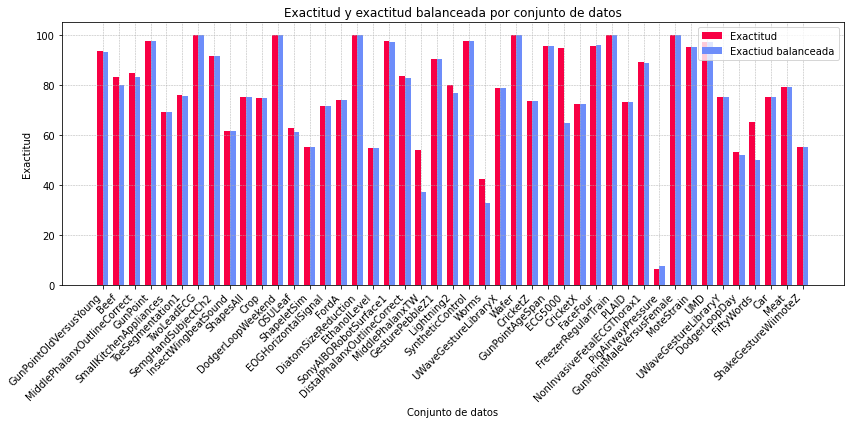

In [585]:
# Número de grupos
n_groups = len(run_names)

# Crear posiciones para las barras
index = np.arange(n_groups)
bar_width = 0.35

# Crear la figura
plt.figure(figsize=(12, 6))

# Colores
colors = ['#F80044', '#6d8dfa']

# Hachuras para las texturas
hatch_patterns = ['///|||', '---+++']  # Hachuras diferentes para cada conjunto de barras

# Gráfica de barras para test_accuracy
plt.bar(index, test_accuracy_values, bar_width, color=colors[0], label='Exactitud')

# Gráfica de barras para test_balanced_accuracy
plt.bar(index + bar_width, test_balanced_accuracy_values, bar_width, color=colors[1], label='Exactiud balanceada')

# Configuración de las etiquetas y título
plt.xlabel('Conjunto de datos')
plt.ylabel('Exactitud')
plt.title('Exactitud y exactitud balanceada por conjunto de datos')
plt.xticks(index + bar_width / 2, run_names, rotation=45, ha='right')

# Añadir la leyenda
plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig("exactitud-exp3.png", format='png', dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

## Experimento 4

#### Pre-entrenamiento

In [501]:
experiment = mlflow.get_experiment_by_name("Pre-train")

In [502]:
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

In [503]:
exp= runs[runs["tags.mlflow.runName"] == "masked-bird-8"]

In [504]:
exp

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.system/gpu_2_power_usage_watts,metrics.system/gpu_2_utilization_percentage,metrics.system/gpu_3_utilization_percentage,metrics.system/gpu_3_memory_usage_percentage,...,params.aditional_loss_function,params.valid_frac,params.train_frac,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.log-model.history,tags.mlflow.note.content,tags.mlflow.source.name,tags.mlflow.source.git.commit
4,880b7adc9a244f31949f09a57d597f53,489730860219751947,FINISHED,file:///opt/code/mlruns/489730860219751947/880...,2024-08-24 19:13:58.374000+00:00,2024-08-25 11:33:14.662000+00:00,147.1,95.0,95.0,30.7,...,None,None,None,root,LOCAL,masked-bird-8,"[{""run_id"": ""880b7adc9a244f31949f09a57d597f53""...",nueva mejora. el codificador posicional ahora ...,timert_cli.py,42daa673aa99fe7670284fed358788d46c2d2912


In [505]:
run_id = exp.iloc[0].run_id

#### Obtener conjuntos de métricas

In [506]:
get_metric_info(run_id, "epoch_time", y_type="time")

00:02:27


In [507]:
get_metric_info(run_id, "system/cpu_utilization_percentage")

15.29175257731959


In [508]:
get_metric_info(run_id, "system/system_memory_usage_megabytes")

9762.022680412372


In [509]:
get_metric_info(run_id, "system/gpu_3_utilization_percentage")

55.21649484536083


In [510]:
get_metric_info(run_id, "system/gpu_3_memory_usage_megabytes")

3566.967010309276


In [511]:
get_metric_info(run_id, "system/gpu_3_power_usage_watts")

123.76597938144329


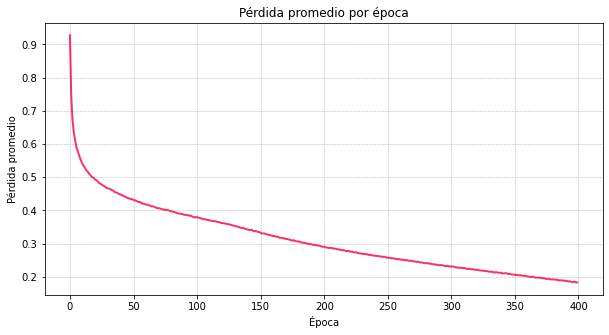

In [512]:
plot_metric(run_id, "average_loss", "Época", "Pérdida promedio", "Pérdida promedio por época", "loos_train_exp4.png")

#### Ajuste fino

In [514]:
experiment = mlflow.get_experiment_by_name("Fine-tuning")

In [515]:
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

In [516]:
exp = runs[runs["tags.mlflow.runName"] ==  "classy-lynx-584"]

In [517]:
exp

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.system/gpu_2_power_usage_watts,metrics.system/gpu_2_utilization_percentage,metrics.system/gpu_3_utilization_percentage,metrics.system/gpu_3_memory_usage_percentage,...,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.source.name,tags.mlflow.parentRunId,tags.mlflow.source.git.commit,tags.pretrain_run_id,tags.mlflow.note.content,tags.pretrain_run_name,tags.pretrain
282,246bcc1ddde64e13ad7a0d745819bb18,278242996031726872,FINISHED,file:///opt/code/mlruns/278242996031726872/246...,2024-08-25 18:33:00.497000+00:00,2024-08-26 05:31:30.075000+00:00,62.4,0.0,0.0,25.7,...,root,LOCAL,classy-lynx-584,timert_cli.py,None,082154634b0f7a6f5b922eae1fbb1d49b208a9b2,880b7adc9a244f31949f09a57d597f53,None,masked-bird-8,None


In [518]:
run_id = exp.iloc[0].run_id

In [519]:
exp_id = exp.iloc[0].experiment_id

In [520]:
get_metric_info(run_id, "system/cpu_utilization_percentage")

10.087179487179485


In [521]:
get_metric_info(run_id, "system/system_memory_usage_megabytes")

8569.776923076925


In [522]:
get_metric_info(run_id, "system/gpu_3_utilization_percentage")

46.08974358974359


In [523]:
get_metric_info(run_id, "system/gpu_3_memory_usage_megabytes")

2968.746153846154


In [524]:
get_metric_info(run_id, "system/gpu_3_power_usage_watts")

112.80256410256409


##### Gráfica de clasificadores

In [525]:
exp_id

'278242996031726872'

In [526]:
all_runs = client.search_runs(
    experiment_ids=[exp_id],
    filter_string=f"tags.mlflow.parentRunId = '{run_id}'"
)

In [527]:
test_accuracies = [[subrun.info.run_name,
                    subrun.data.metrics['test_accuracy'],
                    subrun.data.metrics['test_balanced_accuracy']*100] for subrun in all_runs if 'test_accuracy' in subrun.data.metrics]

In [528]:
test_accuracies

[['GunPointOldVersusYoung', 95.6043956043956, 95.34883720930232],
 ['Beef', 58.333333333333336, 53.333333333333336],
 ['MiddlePhalanxOutlineCorrect', 82.68156424581005, 79.76947535771066],
 ['GunPoint', 100.0, 100.0],
 ['SmallKitchenAppliances', 66.0, 66.0],
 ['ToeSegmentation1', 83.33333333333334, 83.24175824175823],
 ['TwoLeadECG', 100.0, 100.0],
 ['SemgHandSubjectCh2', 87.22222222222223, 87.22222222222221],
 ['InsectWingbeatSound', 62.272727272727266, 62.272727272727266],
 ['ShapesAll', 75.0, 75.0],
 ['Crop', 73.22916666666667, 73.22916666666669],
 ['DodgerLoopWeekend', 100.0, 100.0],
 ['OSULeaf', 59.55056179775281, 56.115240968182135],
 ['ShapeletSim', 97.5, 97.5],
 ['EOGHorizontalSignal', 73.79310344827587, 73.6111111111111],
 ['FordA', 77.66497461928934, 77.83755683365378],
 ['DiatomSizeReduction', 100.0, 100.0],
 ['EthanolLevel', 75.62189054726367, 75.61764705882352],
 ['SonyAIBORobotSurface1', 99.2, 99.0909090909091],
 ['DistalPhalanxOutlineCorrect', 77.27272727272727, 75.76252

In [529]:
run_names = [item[0] for item in test_accuracies]
test_accuracy_values = [item[1] for item in test_accuracies]
test_balanced_accuracy_values = [item[2] for item in test_accuracies]

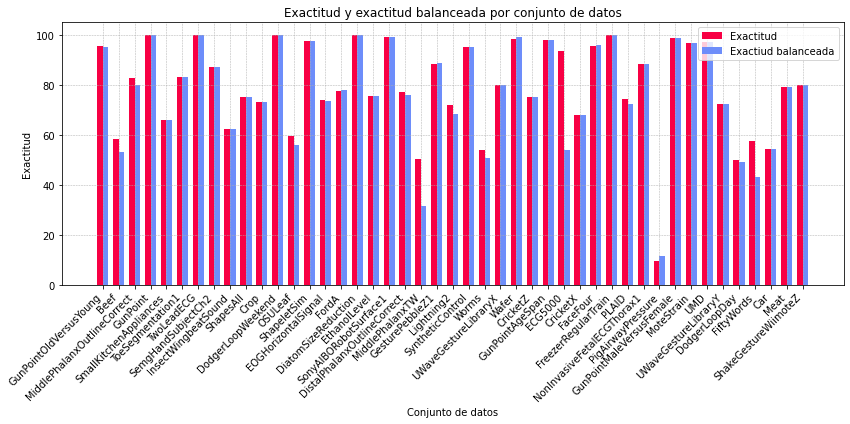

In [532]:
# Número de grupos
n_groups = len(run_names)

# Crear posiciones para las barras
index = np.arange(n_groups)
bar_width = 0.35

# Crear la figura
plt.figure(figsize=(12, 6))

# Colores
colors = ['#F80044', '#6d8dfa']

# Hachuras para las texturas
hatch_patterns = ['///|||', '---+++']  # Hachuras diferentes para cada conjunto de barras

# Gráfica de barras para test_accuracy
plt.bar(index, test_accuracy_values, bar_width, color=colors[0], label='Exactitud')

# Gráfica de barras para test_balanced_accuracy
plt.bar(index + bar_width, test_balanced_accuracy_values, bar_width, color=colors[1], label='Exactiud balanceada')

# Configuración de las etiquetas y título
plt.xlabel('Conjunto de datos')
plt.ylabel('Exactitud')
plt.title('Exactitud y exactitud balanceada por conjunto de datos')
plt.xticks(index + bar_width / 2, run_names, rotation=45, ha='right')

# Añadir la leyenda
plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig("exactitud-exp4.png", format='png', dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [531]:
for run in all_runs[0:2]:
    # Acceder a los atributos de `Run`
    run_id = run.info.run_id
    experiment_id = run.info.experiment_id
    run_name = run.info.run_name
    status = run.info.status
    start_time = run.info.start_time
    end_time = run.info.end_time
    user_id = run.info.user_id

    # Acceder a las métricas
    metrics = run.data.metrics
    for metric_name, metric_value in metrics.items():
        print(f"Metric: {metric_name} = {metric_value}")
    
    # Acceder a los parámetros
    params = run.data.params
    for param_name, param_value in params.items():
        print(f"Param: {param_name} = {param_value}")
    
    # Acceder a los tags
    tags = run.data.tags
    for tag_name, tag_value in tags.items():
        print(f"Tag: {tag_name} = {tag_value}")
    
    # Información adicional del run
    artifact_uri = run.info.artifact_uri
    print(f"Run ID: {run_id}, Experiment ID: {experiment_id}, Run Name: {run_name}")
    print(f"Status: {status}, Start Time: {start_time}, End Time: {end_time}, User ID: {user_id}")
    print(f"Artifact URI: {artifact_uri}")
    print("-----------")

Metric: average_loss_train = 2.1119857046869582e-05
Metric: train_accuracy = 100.0
Metric: average_loss_validation = 0.09964287932962179
Metric: validation_accuracy = 95.55555555555556
Metric: epoch_time = 0.3995237350463867
Metric: total_train_eval_time = 434.73295736312866
Metric: test_accuracy = 95.6043956043956
Metric: test_balanced_accuracy = 0.9534883720930232
Metric: test_precision_macro = 0.46153846153846156
Metric: test_recall_macro = 0.5
Metric: test_f1_macro = 0.48000000000000004
Metric: test_precision_micro = 0.9230769230769231
Metric: test_recall_micro = 1.0
Metric: test_f1_micro = 0.9600000000000001
Metric: precision_class_1 = 0.9230769230769231
Metric: recall_class_1 = 1.0
Metric: f1_class_1 = 0.9600000000000001
Metric: precision_class_2 = 0.0
Metric: recall_class_2 = 0.0
Metric: f1_class_2 = 0.0
Metric: total_test_time = 0.8845784664154053
Metric: best_epoch = 287.0
Metric: best_train_loss = 4.765670601045713e-05
Metric: best_train_accuracy = 100.0
Metric: best_eval_los

## extras

In [360]:
# tiempos de época
#epoch_times = mlflow.get_metric_history(run_id=run_id, key="epoch_time")


In [361]:
epoch_time_values = [metric.value for metric in epoch_time_history]
#epoch_time_values = [cast_to_datetime(value) for value in epoch_time_values]
epoch_time_steps = [metric.step for metric in epoch_time_history]

In [362]:
promedio_segs = sum(epoch_time_values) / len(epoch_time_values)

In [363]:
promedio_segs = cast_to_datetime(promedio_segs)

In [364]:
promedio_segs.__str__()

'00:02:16'

In [365]:
epoch_time_values = [cast_to_datetime(value) for value in epoch_time_values]

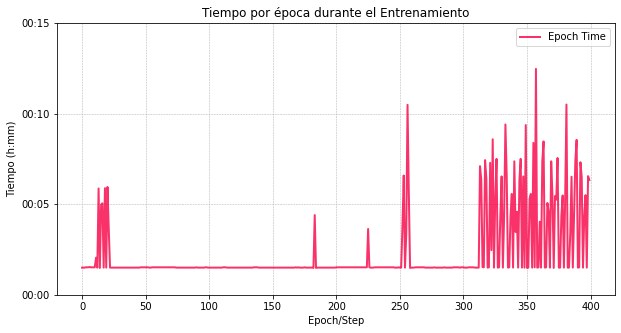

In [366]:
# Graficar tiempo por batch
datetime_objects = [datetime.combine(datetime(1900, 1, 1), t) for t in epoch_time_values]
# Crear la figura y el gráfico
plt.figure(figsize=(10, 5))
# Usar un color cálido (naranja) para la línea
plt.plot(epoch_time_steps, datetime_objects, label="Epoch Time", color="#F80044", linewidth=2, alpha=0.8)  # Coral
# Configurar el eje Y para comenzar en cero y tener intervalos de 15 minutos
plt.gca().yaxis.set_major_locator(mdates.MinuteLocator(interval=5))
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# Configurar el rango del eje Y
plt.ylim([datetime.combine(datetime(1900, 1, 1), time(0, 0)), 
          datetime.combine(datetime(1900, 1, 1), time(0, 15))])
# Etiquetas y título
plt.xlabel('Epoch/Step')
plt.ylabel('Tiempo (h:mm)')
plt.title('Tiempo por época durante el Entrenamiento')
# Mostrar la cuadrícula para mayor claridad
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Mostrar la leyenda
plt.legend()
# Mostrar el gráfico
plt.show()

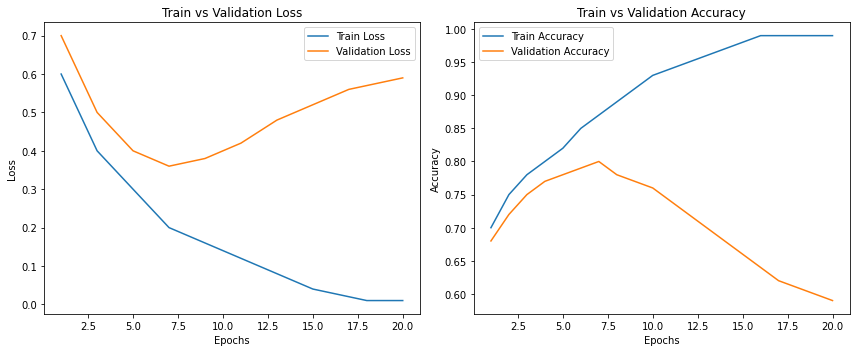

In [586]:
import matplotlib.pyplot as plt

# Ejemplo de datos (simulados)
epochs = range(1, 21)
train_loss = [0.6, 0.5, 0.4, 0.35, 0.3, 0.25, 0.2, 0.18, 0.16, 0.14, 0.12, 0.1, 0.08, 0.06, 0.04, 0.03, 0.02, 0.01, 0.01, 0.01]
val_loss = [0.7, 0.6, 0.5, 0.45, 0.4, 0.38, 0.36, 0.37, 0.38, 0.4, 0.42, 0.45, 0.48, 0.5, 0.52, 0.54, 0.56, 0.57, 0.58, 0.59]
train_acc = [0.7, 0.75, 0.78, 0.8, 0.82, 0.85, 0.87, 0.89, 0.91, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.99, 0.99, 0.99, 0.99]
val_acc = [0.68, 0.72, 0.75, 0.77, 0.78, 0.79, 0.8, 0.78, 0.77, 0.76, 0.74, 0.72, 0.7, 0.68, 0.66, 0.64, 0.62, 0.61, 0.6, 0.59]

# Gráfico de pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

# Gráfico de exactitud
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
